In [5]:
import torch 
from torch import nn, optim 
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader

# Use of GPU otherwise CPU 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# List of transformation
tf = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Opens en applies transformations established previously
train_dl = DataLoader(
    datasets.ImageFolder('data/Training', tf),
    batch_size=32, shuffle=True, num_workers=4, pin_memory=True 
)

test_dl = DataLoader(
    datasets.ImageFolder('data/Testing', tf),
    batch_size=32, shuffle=True, num_workers=4, pin_memory=True 
)

In [3]:
model = nn.Sequential(
    nn.Conv2d(3, 32, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(32, 64, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(64, 128, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128 * 16 * 16, 256), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(256, 4) # There are four classes
).to(device)

In [4]:
opt = optim.AdamW(model.parameters(), 1e-4)
loss_fn = nn.CrossEntropyLoss()

In [6]:
model.train()

for epoch in range(25) :
    running_loss = 0

    for x, y in train_dl :
        opt.zero_grad()

        loss = loss_fn(model(x.to(device)), y.to(device))
        loss.backward()

        running_loss += loss 

        opt.step()

    print(f'Epoch {epoch + 1}: Loss was {running_loss}')

        

c:\Users\qevan\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1: Loss was 152.30270385742188
Epoch 2: Loss was 103.6070556640625
Epoch 3: Loss was 87.07495880126953
Epoch 4: Loss was 74.62388610839844
Epoch 5: Loss was 65.86027526855469
Epoch 6: Loss was 58.61150360107422
Epoch 7: Loss was 50.34902572631836
Epoch 8: Loss was 46.774024963378906
Epoch 9: Loss was 42.22377395629883
Epoch 10: Loss was 36.864593505859375
Epoch 11: Loss was 34.560630798339844
Epoch 12: Loss was 30.837270736694336
Epoch 13: Loss was 26.791500091552734
Epoch 14: Loss was 24.539220809936523
Epoch 15: Loss was 23.313674926757812
Epoch 16: Loss was 21.63327980041504
Epoch 17: Loss was 17.861398696899414
Epoch 18: Loss was 17.32862091064453
Epoch 19: Loss was 16.333770751953125
Epoch 20: Loss was 14.059627532958984
Epoch 21: Loss was 12.894647598266602
Epoch 22: Loss was 11.809785842895508
Epoch 23: Loss was 11.582215309143066
Epoch 24: Loss was 9.74748706817627
Epoch 25: Loss was 9.070270538330078


In [7]:
# Use of the test set 

model.eval()
test_loss, correct = 0.0, 0

with torch.no_grad():
    for x, y in test_dl :
        x, y = x.to(device), y.to(device)
    
        logits = model(x)
        test_loss += loss_fn(logits, y).item() * y.size(0)

        preds = logits.argmax(dim = 1)
        correct += (preds == y).sum().item()

test_loss /= len(test_dl.dataset)
accuracy = 100.0 * correct / len(test_dl.dataset)

print('Test loss :', test_loss, 'Test accuracy :', accuracy)

c:\Users\qevan\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Test loss : 0.1306293540265522 Test accuracy : 96.26239511823036


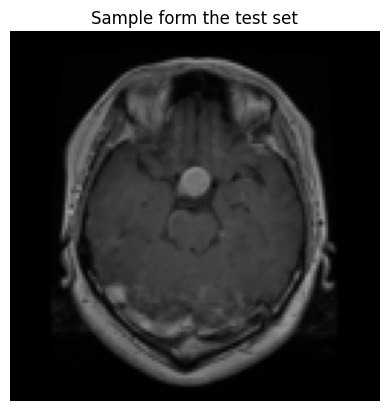

Predicted class : pituitary
Ground-truth : pituitary


In [11]:
# Visualising a random image of a brain

import random 

import matplotlib.pyplot as plt 
from torchvision.transforms.functional import to_pil_image

model.eval()

idx = random.randrange(len(test_dl.dataset))
img, label = test_dl.dataset[idx]

unnorm = img * 0.5 + 0.5
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.title('Sample form the test set')
plt.show()

with torch.no_grad() : 
    logits = model(img.unsqueeze(0).to(device))
    pred = logits.argmax(1).item()

class_names = test_dl.dataset.classes
print(f"Predicted class : {class_names[pred]}")
print(f"Ground-truth : {class_names[label]}")